# Problem - 2 (Glioma Grading Dataset - for Logistic Regression (predicting the presence TCGA-LGG and TCGA-GBM brain glioma))

## Background
This Brain Tumor Classifier is designed to classify Lower Grade Gliomas (LGG) and Glioblastoma Multiforme (GBM). These are types of astrocytomas, which are brain tumors originating from astrocyte glial cells that support and protect neurons. Astrocytomas are categorized into four grades based on their malignancy and growth rate:

Grade I (Pilocytic Astrocytoma): These tumors are slow-growing and often considered benign. Grade II (Diffuse Astrocytoma): These are considered low-grade and slow-growing but can become more malignant over time. Grade III (Anaplastic Astrocytoma): These are malignant tumors that grow more rapidly than Grade II tumors. Grade IV (Glioblastoma Multiforme): The most aggressive and malignant type, with rapid growth and poor prognosis. Our classifier focuses on distinguishing between LGG (encompassing Grades II and III) and GBM (Grade IV), providing a critical tool for aiding in the diagnosis and treatment planning for these specific types of gliomas.

## Data Preprocessing

#### Loading Dataset

In [24]:
import numpy as np
import pandas as pd


df = pd.read_csv("TCGA_InfoWithGrade.csv")
df

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,0,51.30,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,38.72,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,35.17,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,32.78,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,31.51,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,1,1,77.89,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
835,1,0,85.18,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
836,1,1,77.49,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
837,1,0,63.33,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Grade             839 non-null    int64  
 1   Gender            839 non-null    int64  
 2   Age_at_diagnosis  839 non-null    float64
 3   Race              839 non-null    int64  
 4   IDH1              839 non-null    int64  
 5   TP53              839 non-null    int64  
 6   ATRX              839 non-null    int64  
 7   PTEN              839 non-null    int64  
 8   EGFR              839 non-null    int64  
 9   CIC               839 non-null    int64  
 10  MUC16             839 non-null    int64  
 11  PIK3CA            839 non-null    int64  
 12  NF1               839 non-null    int64  
 13  PIK3R1            839 non-null    int64  
 14  FUBP1             839 non-null    int64  
 15  RB1               839 non-null    int64  
 16  NOTCH1            839 non-null    int64  
 1

From the above we can already infer that our dataset is pretty clean already, We don't have to deal with string conversions.

In [26]:
df.describe()

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
count,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,...,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000
mean,0.419547,0.418355,50.935411,0.107271,0.481526,0.414779,0.258641,0.168057,0.133492,0.132300,...,0.053635,0.047676,0.045292,0.034565,0.032181,0.032181,0.032181,0.027414,0.027414,0.026222
std,0.493779,0.493583,15.702339,0.369392,0.499957,0.492978,0.438149,0.374140,0.340309,0.339019,...,0.225431,0.213206,0.208068,0.182784,0.176586,0.176586,0.176586,0.163383,0.163383,0.159889
min,0.000000,0.000000,14.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,38.055000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,51.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,62.800000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,89.290000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Handling Missing values

In [27]:
df.isnull().sum()

Grade               0
Gender              0
Age_at_diagnosis    0
Race                0
IDH1                0
TP53                0
ATRX                0
PTEN                0
EGFR                0
CIC                 0
MUC16               0
PIK3CA              0
NF1                 0
PIK3R1              0
FUBP1               0
RB1                 0
NOTCH1              0
BCOR                0
CSMD3               0
SMARCA4             0
GRIN2A              0
IDH2                0
FAT4                0
PDGFRA              0
dtype: int64

Dataset has no null values.

## Basic EDA

In [28]:
df["Grade"].value_counts()  # count of each class in our dataset

Grade
0    487
1    352
Name: count, dtype: int64

 0 represent Grade LGG
 
 1 represent grade GBM

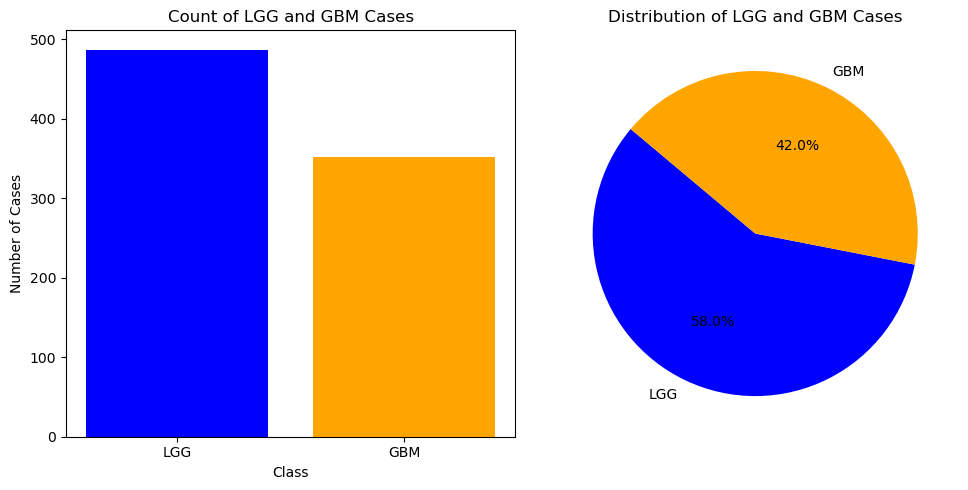

In [29]:
import matplotlib.pyplot as plt

# Counting the occurrences of each class
num_lgg = df['Grade'].value_counts()[0]
num_gbm = df['Grade'].value_counts()[1]


plt.figure(figsize=(10, 5))

# Bar plot for count of LGG and GBM cases
plt.subplot(1, 2, 1)
plt.bar(['LGG', 'GBM'], [num_lgg, num_gbm], color=['blue', 'orange'])
plt.title('Count of LGG and GBM Cases')
plt.xlabel('Class')
plt.ylabel('Number of Cases')

# Pie chart for distribution of LGG and GBM cases
plt.subplot(1, 2, 2)
plt.pie([num_lgg, num_gbm], labels=['LGG', 'GBM'], colors=['blue', 'orange'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of LGG and GBM Cases')

plt.tight_layout()
plt.show()

In [30]:
# Unique counts for categorical columns
categorical_cols = ['Gender', 'Race', 'IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 
                    'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA']
df[categorical_cols].nunique()

Gender     2
Race       4
IDH1       2
TP53       2
ATRX       2
PTEN       2
EGFR       2
CIC        2
MUC16      2
PIK3CA     2
NF1        2
PIK3R1     2
FUBP1      2
RB1        2
NOTCH1     2
BCOR       2
CSMD3      2
SMARCA4    2
GRIN2A     2
IDH2       2
FAT4       2
PDGFRA     2
dtype: int64

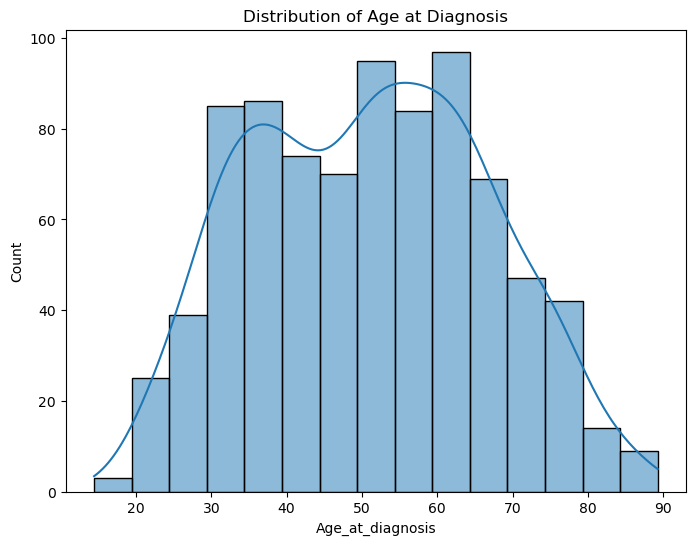

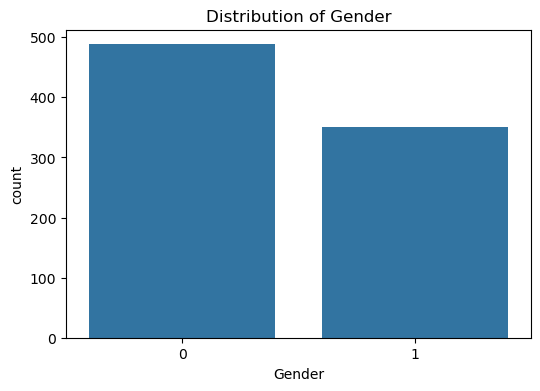

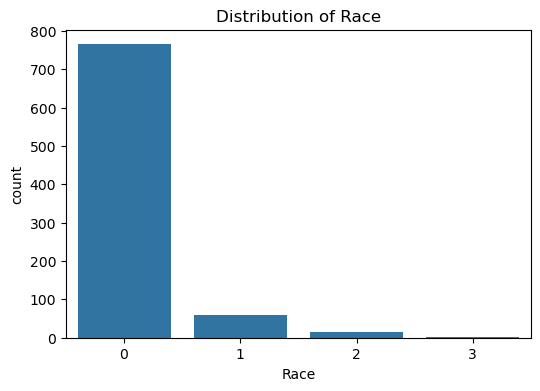

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Age_at_diagnosis'], kde=True)
plt.title('Distribution of Age at Diagnosis')
plt.show()

# Bar plots for categorical columns
for col in ['Gender', 'Race']:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()


### Statistical Insights:

Age Distribution:

The age at diagnosis shows a multimodal distribution, with peaks around ages 35-40 and 60-65
The age range spans from 20 to 90 years
Highest concentration appears to be between 30-70 years
There's a notable dip around age 50
Mean age appears to be approximately 50-55 years


Gender Distribution (0=Male, 1=Female):

Approximately 60% male (around 480 counts)
Approximately 40% female (around 350 counts)
Clear gender imbalance in the dataset


Race Distribution:


Heavily skewed towards one racial group (category 0)
Category 0: ~750 individuals
Category 1: ~50 individuals
Category 2: ~20 individuals
Category 3: Very few individuals
Shows significant racial disparity in the dataset



### Business Insights

Targeted Healthcare Programs->
1. Develop age-specific intervention programs, particularly focusing on the two major age peaks (35-40 and 60-65)
2. Create specialized care protocols for different age groups given the wide age distribution


Diversity and Inclusion Initiatives->
1. Implement outreach programs to underrepresented racial groups
2. Investigate potential barriers to healthcare access for minority groups
3. Develop culturally sensitive healthcare programs and communication materials

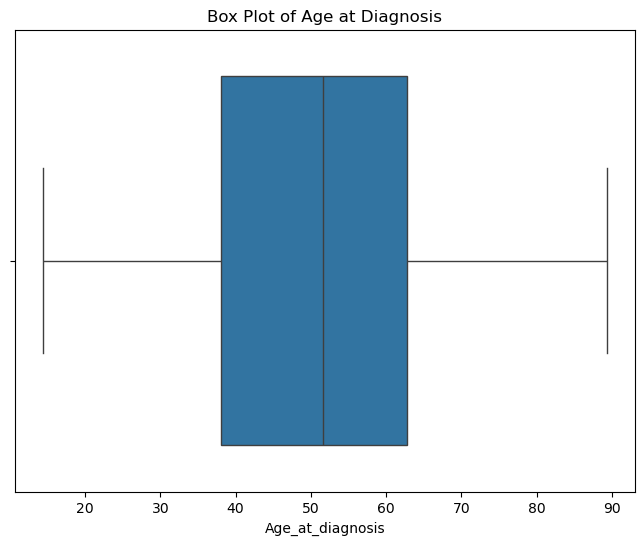

In [32]:
# Box plot for Age to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age_at_diagnosis'])
plt.title('Box Plot of Age at Diagnosis')
plt.show()

There are no outliers in Age feature.

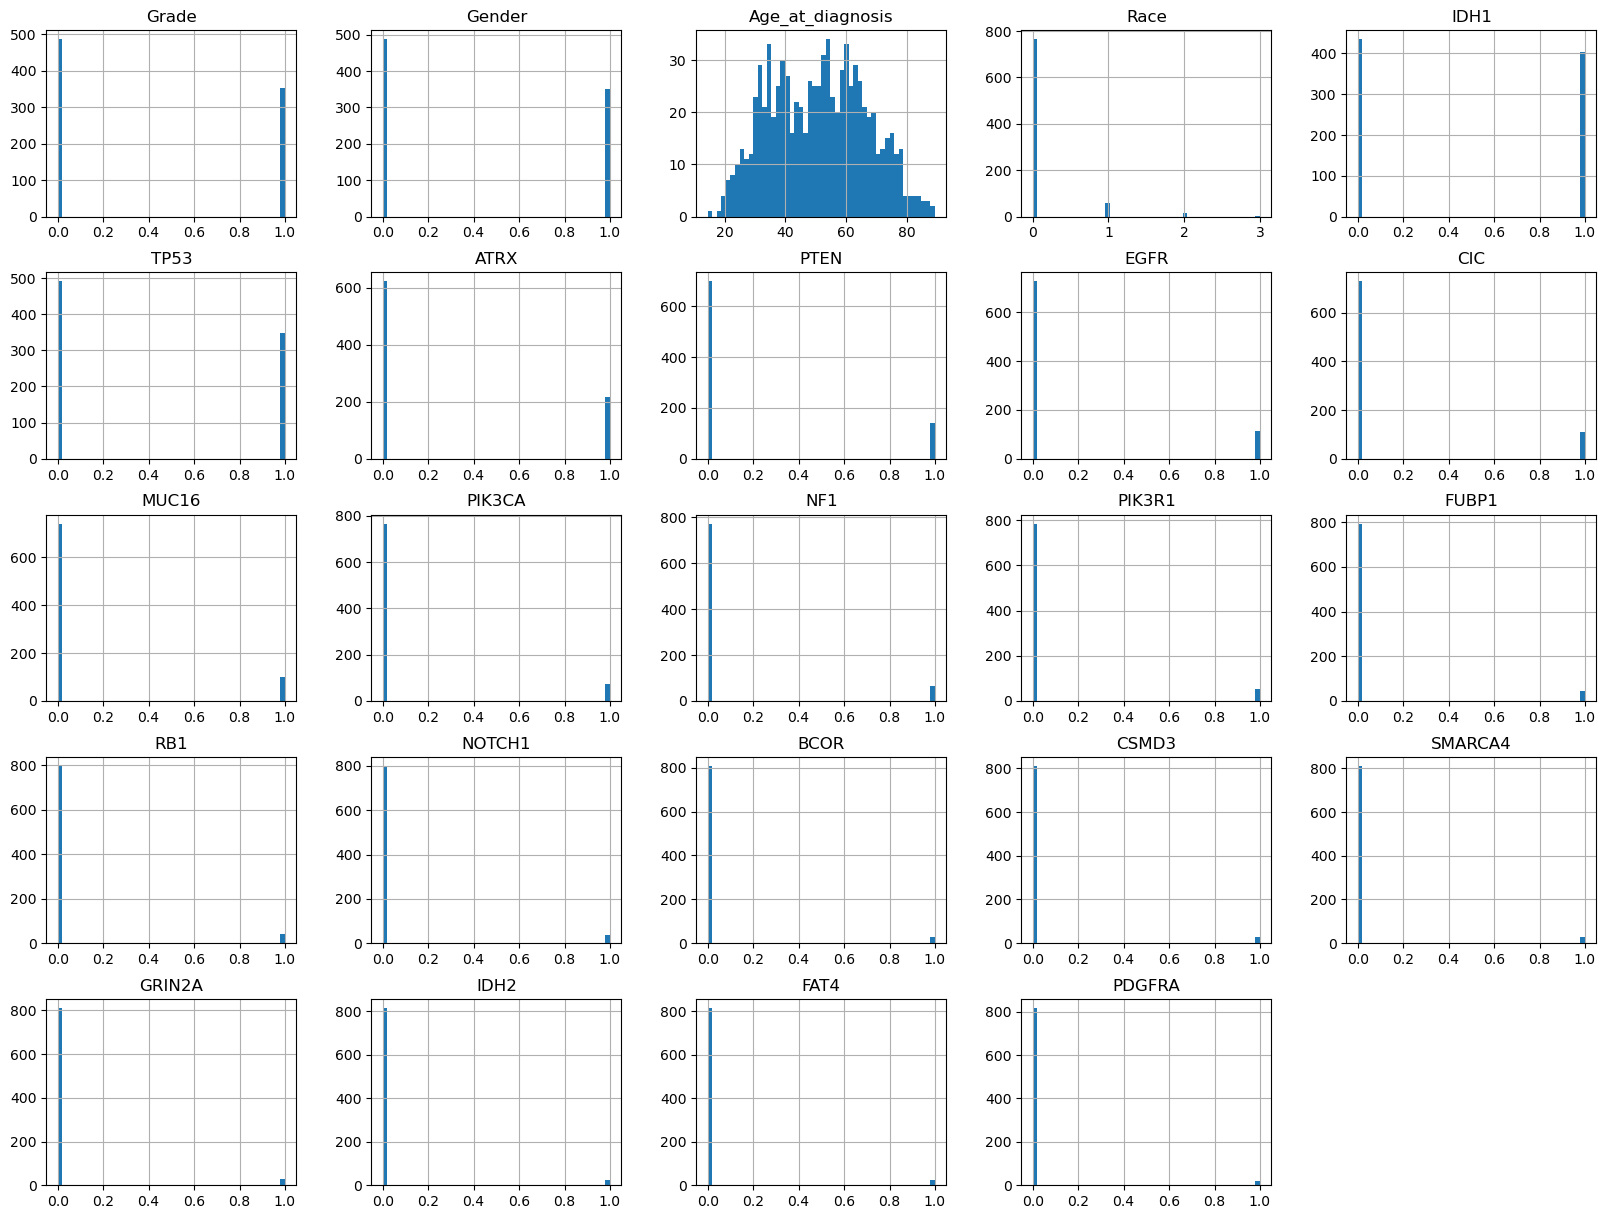

In [14]:
df.hist(bins=50, figsize=(20,15))
plt.show()

From the above we can see how the data is distributed column-wise. We can see that our label column, 'Grade' doesn't seem to have a lot of imbalance which is very good. We don't have to further complicate the data cleaning process.

### Feature Engineering

In [33]:
df_encoded = pd.get_dummies(df, columns=['Race'])

df_encoded['Race_0'] = df_encoded['Race_0'].map({True: 1, False: 0})
df_encoded['Race_1'] = df_encoded['Race_1'].map({True: 1, False: 0})
df_encoded['Race_2'] = df_encoded['Race_2'].map({True: 1, False: 0})
df_encoded['Race_3'] = df_encoded['Race_3'].map({True: 1, False: 0})

df_encoded.head()

,Grade,Gender,Age_at_diagnosis,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,...,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,Race_0,Race_1,Race_2,Race_3
0,0,0,51.30,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,38.72,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,35.17,1,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,32.78,1,1,1,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
4,0,0,31.51,1,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


The Race column is a categorical column, therefore, we would be utilizing a One Hot Encoder to categorize it.

### Correlation


In [34]:
df_encoded.corr()

,Grade,Gender,Age_at_diagnosis,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,...,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,Race_0,Race_1,Race_2,Race_3
Grade,1.000000,-0.060033,0.529203,-0.708141,-0.161786,-0.314625,0.367174,0.241527,-0.303459,0.119447,...,0.050257,-0.100286,0.118685,-0.113150,0.034767,0.102327,-0.110323,0.125130,0.002382,-0.029369
Gender,-0.060033,1.000000,-0.016337,0.048282,0.002022,0.056376,-0.032233,-0.034497,0.061063,0.015054,...,0.037026,-0.004047,-0.004047,0.020389,0.064781,0.027160,-0.008876,0.021896,-0.016165,-0.029297
Age_at_diagnosis,0.529203,-0.016337,1.000000,-0.568892,-0.315863,-0.418411,0.259421,0.227660,-0.122851,0.089834,...,0.003397,-0.068581,0.026327,-0.123362,0.036702,0.069623,-0.035154,0.050483,-0.020875,-0.007672
IDH1,-0.708141,0.048282,-0.568892,1.000000,0.340995,0.454920,-0.394862,-0.357217,0.320696,-0.097956,...,-0.040566,0.094600,-0.108149,-0.161795,-0.059533,-0.113357,0.106263,-0.125107,0.023439,-0.033291
TP53,-0.161786,0.002022,-0.315863,0.340995,1.000000,0.546903,-0.067829,-0.173952,-0.278753,0.017712,...,0.065811,0.079519,-0.016436,-0.067262,0.021632,-0.001895,0.082694,-0.061234,-0.053011,-0.029082
ATRX,-0.314625,0.056376,-0.418411,0.454920,0.546903,1.000000,-0.185397,-0.159805,-0.174403,0.005535,...,0.015681,0.077374,-0.015166,-0.015815,0.000854,0.005279,0.030133,-0.024057,-0.013195,-0.020404
PTEN,0.367174,-0.032233,0.259421,-0.394862,-0.067829,-0.185397,1.000000,0.179739,-0.137868,0.044961,...,0.062539,-0.027771,0.098663,-0.055936,0.002629,-0.013909,-0.040058,0.063388,-0.033664,-0.015526
EGFR,0.241527,-0.034497,0.227660,-0.357217,-0.173952,-0.159805,0.179739,1.000000,-0.122233,0.086390,...,0.166718,0.007858,0.146861,-0.044434,0.019953,0.045248,-0.050933,0.070229,-0.023772,-0.013559
CIC,-0.303459,0.061063,-0.122851,0.320696,-0.278753,-0.174403,-0.137868,-0.122233,1.000000,-0.021526,...,-0.011404,0.028462,0.028462,0.128339,0.020620,0.023983,0.047017,-0.052360,0.004059,-0.013489
MUC16,0.119447,0.015054,0.089834,-0.097956,0.017712,0.005535,0.044961,0.086390,-0.021526,1.000000,...,0.101903,0.038821,0.101903,-0.015602,0.098030,0.149330,-0.030835,0.045114,-0.018404,-0.012563


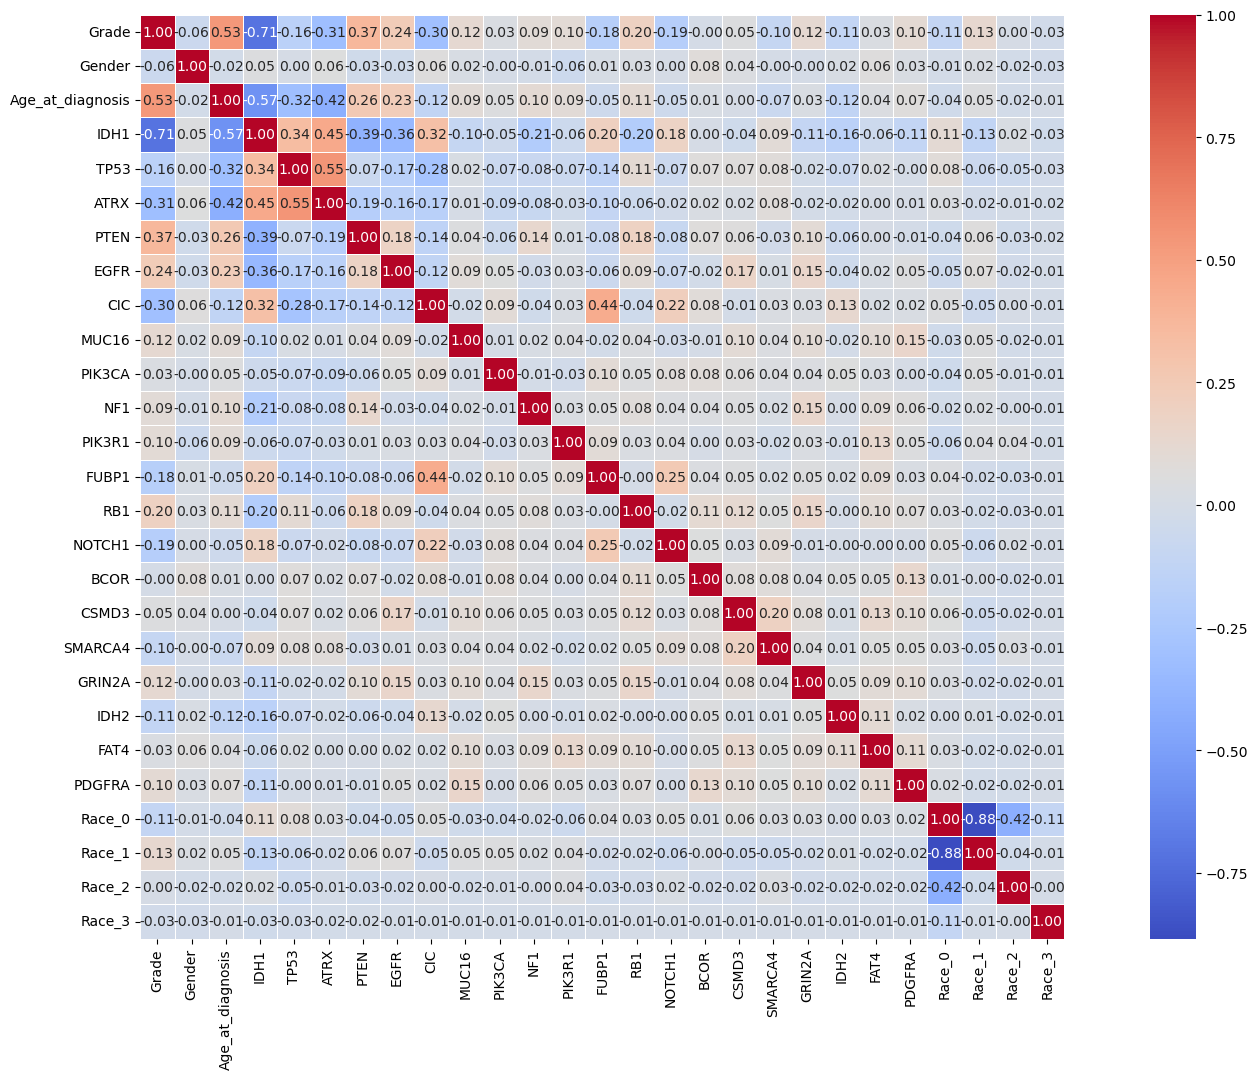

In [18]:
correlation_matrix = df_encoded.corr()

# Set up the matplotlib figure
plt.figure(figsize=(22, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)

# Show the plot
plt.show()

### Insights
Age and Tumor Grade: Older patients tend to have higher-grade tumors, indicating a potential target for age-specific tumor monitoring and treatment strategies.

IDH1 Mutation as a Biomarker: The strong negative correlation between IDH1 mutation and tumor grade suggests that the absence of IDH1 could signal more aggressive tumors. This makes IDH1 a valuable biomarker for assessing tumor severity and guiding treatment options.

TP53 and ATRX Pathway Relevance: The positive correlations among TP53, ATRX, and IDH1 highlight a potential pathway of interest. Understanding this could help develop targeted therapies that address specific gene interactions, particularly for specific tumor types.

Race and Demographic Patterns: Distinct correlations among race encodings indicate demographic distinctions that could inform personalized treatment or risk assessment, especially in diverse populations.

PTEN and EGFR as Tumor Grade Indicators: Positive correlations between PTEN, EGFR, and tumor grade suggest these genes could serve as additional markers for tumor aggressiveness. This can aid in building predictive models for prognosis and therapeutic response.

These insights can guide personalized oncology approaches and genetic testing, potentially improving patient outcomes by tailoring interventions based on genetic profiles and demographics.

### Feature Scaling

In [35]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
df_encoded[['Age_at_diagnosis']]=sc.fit_transform(df_encoded[['Age_at_diagnosis']])

df_encoded.head()

,Grade,Gender,Age_at_diagnosis,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,...,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,Race_0,Race_1,Race_2,Race_3
0,0,0,0.023233,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,-0.778400,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,-1.004616,1,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,-1.156913,1,1,1,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
4,0,0,-1.237841,1,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


The values we have for our 'Age_at_diagnosis' is quite large, therefore, we would need to standardize it.

### Feature Selection


In [36]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder

# Assume `X` is your feature matrix (categorical features) and `y` is your target variable
# Encode categorical features as integers for chi-square compatibility
y = df_encoded['Grade']
df_encoded = df_encoded.drop(columns=['Grade'])
X_encoded = df_encoded.apply(LabelEncoder().fit_transform)

# Perform chi-square test and select top 15 features
selector = SelectKBest(score_func=chi2, k=15)
X_selected = selector.fit_transform(X_encoded, y)

# Get selected feature names
selected_features = df_encoded.columns[selector.get_support(indices=True)]

# Display selected features
print("Top 15 features selected by chi-square test:", selected_features)


Top 15 features selected by chi-square test: Index(['Age_at_diagnosis', 'IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR', 'CIC',
       'MUC16', 'FUBP1', 'RB1', 'NOTCH1', 'GRIN2A', 'IDH2', 'PDGFRA',
       'Race_1'],
      dtype='object')


### Splitting

In [ ]:
from sklearn.model_selection import train_test_split

# Use selected features from chi-square test
X_selected_df = df_encoded[selected_features]

# Split data into training and test sets ( 80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_selected_df, y, test_size=0.2, random_state=42)

# Check the shapes of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (671, 15)
X_test shape: (168, 15)
y_train shape: (671,)
y_test shape: (168,)


### Logistic regression Model


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

### Model Accuracy

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8690476190476191
Precision: 0.8777531991817705
Recall: 0.8690476190476191
F1 Score: 0.8689362491984747

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.81      0.87        89
           1       0.81      0.94      0.87        79

    accuracy                           0.87       168
   macro avg       0.87      0.87      0.87       168
weighted avg       0.88      0.87      0.87       168



The logistic regression model achieved:

Accuracy: 86.9% – meaning the model correctly predicted approximately 87% of the cases.

Precision: 87.8% – indicating that, on average, 87.8% of the positive predictions were correct.

Recall: 86.9% – showing the model was able to capture around 87% of the true positives across classes.

F1 Score: 86.9% – a balanced metric reflecting both precision and recall.

Classification Report Analysis:

Class 0:

Precision: 94% – indicates that predictions for class 0 were highly accurate.

Recall: 81% – suggests that about 19% of class 0 cases were misclassified.

F1 Score: 87% – a balanced measure for class 0, showing strong model performance here.

Class 1:
Precision: 81% – lower than class 0, indicating more false positives.

Recall: 94% – suggests the model captured almost all class 1 cases with few false negatives.

F1 Score: 87% – shows a good balance, though recall is prioritized for class 1.

### Analyze the Confusion Matrix

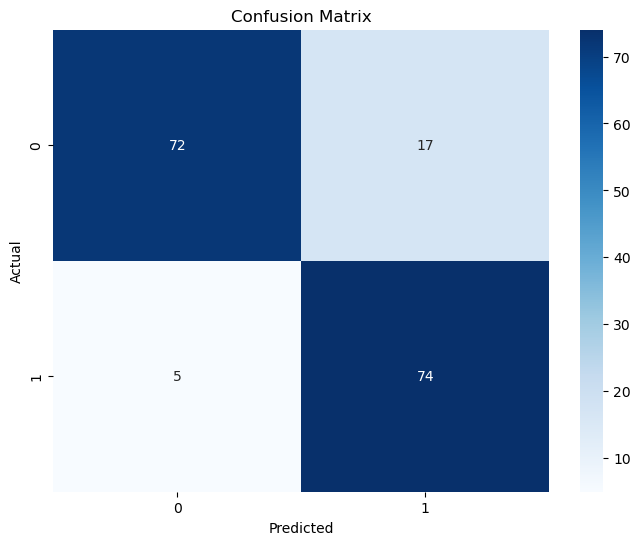

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


###  Insights from Confusion Matrix Analysis:
False Positives in Class 1: The model occasionally misclassifies class 0 cases as class 1, potentially due to overlapping features between these classes.

False Negatives in Class 0: Misclassifications of class 1 cases as class 0 suggest that the model is slightly more conservative in predicting class 0.

### Business Insight

The model demonstrates strong overall performance with 86.9% accuracy, 87.8% precision, and 86.9% recall, balancing the identification of both high- and low-priority cases.

Class 0: High precision (94%) but lower recall (81%), indicating that while it avoids false positives, some true class 0 cases are missed.

Class 1: High recall (94%) but lower precision (81%), ensuring that most high-risk cases are detected, but some false positives occur.

For business, this model is ideal for scenarios where missing critical cases (class 1) is costly, such as in healthcare or fraud detection, but some false positives (class 0 misclassified as 1) are acceptable. Adjusting precision and recall based on priorities can optimize the model's impact.

# Discussion and Interpretation

1. Model Comparison:

Linear Regression (Wine Quality Dataset): Suitable for continuous outcomes like wine quality ratings. However, it struggles when applied to categorical outcomes (like Grade), leading to not good performance in this classification task.

Logistic Regression (Grade Dataset): Well-suited for binary classification tasks, such as predicting grades (e.g., 0 or 1). Logistic regression handled the task effectively with 86.9% accuracy, ensuring both precision and recall were balanced.

2. Preprocessing and Model Challenges:

Data Encoding: In both models, encoding categorical features was crucial, but linear regression faced issues in classification tasks, while logistic regression was more appropriate for this problem.

Model Issues: Linear regression faced difficulties with accuracy when applied to categorical data, while logistic regression performed better due to its alignment with the binary classification nature of the dataset.

3. Results Reflection:

Surprise: The poor performance of Linear Regression on categorical data was expected, but its application in the Wine Quality dataset was more effective.

Improvements: Logistic regression can be further improved by tuning its hyperparameters and experimenting with other classification algorithms like Random Forest or SVM for potential accuracy improvements.

In conclusion, Logistic Regression was the ideal model for this binary classification problem, while Linear Regression was more suitable for continuous data like the Wine Quality dataset. Further enhancements in model tuning could improve performance for both cases.